# Resistivity
-------
Today's goals
* DC Experiment
* What we measure
* How we measure it

### DC Resistivity:

Fundamental Experiment:
* Inject electrical currents into the subsurface (and retrieve them)
* Current channel into conductors and around resistors
* Measure Electrical Potential to infer distribution of currents:

![survey](https://mineclosure.gtk.fi/wp-content/uploads/2018/09/KUVA9_v2-1024x722.jpg)

In [12]:
from geoana.em.static import DipoleHalfSpace
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [185]:
def fig1(A=None, B=None, draw_source=False, draw_potential=False):
    if A is None:
        A = [-20, 0, 0]
    if B is None:
        B = [20, 0, 0]
    dip = DipoleHalfSpace(0.01, A, B)

    x = np.linspace(-40, 40, 256)
    z = np.linspace(-40, 0, 128)
    xyz = np.meshgrid(x, [0], z)
    
    V = dip.potential(xyz).squeeze()
    E = dip.electric_field(xyz).squeeze()

    draw_source = draw_source or draw_potential
    if draw_source:
        fig, axs = plt.subplots(2, 1, sharex=True, dpi=200)
        ax = axs[1]
        fig.subplots_adjust(hspace=0)
    else:
        fig = plt.figure(dpi=200)
        ax = plt.gca()
        axs = ax
    
    im = ax.pcolormesh(x, z, V.T, norm=mpl.colors.SymLogNorm(0.0001), cmap='seismic')
    ax.streamplot(x, z, E[...,0].T, E[...,2].T)
    if draw_source:
        ax_circ = axs[0]
        ax_circ.axis('off')
        
        # Draw a simple battery + resistor + wire
        ax_circ.plot([-20,-20, -2], [0,1, 1], color='k')       # wire
        ax_circ.plot([-2, -2], [0.5, 1.5], color='k', lw=2)  # battery left
        ax_circ.plot([2, 2], [0.8, 1.2], color='k', lw=1)  # battery right
        ax_circ.plot([2, 20, 20], [1, 1, 0], color='k')     # wire
        ax_circ.text(-22, 0, 'A', fontsize=12, horizontalalignment='right', verticalalignment='bottom')
        ax_circ.text(22, 0, 'B', fontsize=12, horizontalalignment='left', verticalalignment='bottom')


        if draw_potential:
            ax_circ.plot([-5, -5, -1], [0, 0.3, 0.3], color='b')
            ax_circ.plot([3, 7, 7], [0.3, 0.3, 0], color='b')
            ax_circ.text(1, 0.3, 'V', fontsize=12, horizontalalignment='center', verticalalignment='center')
            circ = mpl.patches.Ellipse([1,0.3], height=0.5,width=4, fill=False,edgecolor='b')
            ax_circ.add_patch(circ)
            ax_circ.text(-6, 0, 'M', fontsize=12, horizontalalignment='right', verticalalignment='bottom')
            ax_circ.text(8, 0, 'N', fontsize=12, horizontalalignment='left', verticalalignment='bottom')

        ax_circ.set_ylim([0, 5])
    else:
        ax.set_aspect(1)
    cb = plt.colorbar(im, shrink=0.5, ax=axs)
    
    cb.set_label('Potential (V)')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Z (m)')

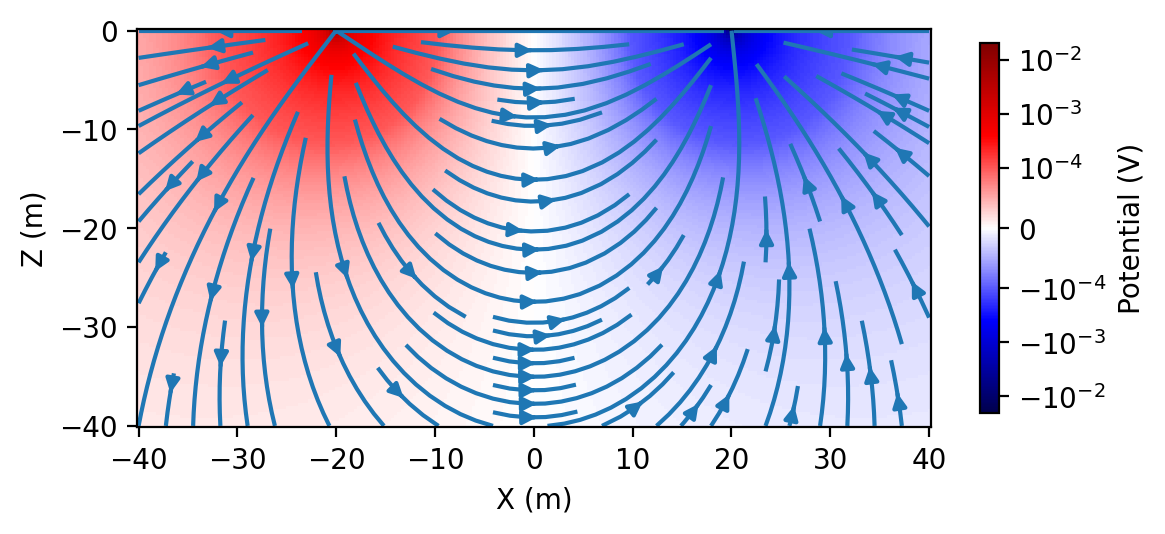

In [193]:
fig1()

## Conservation of charge

Divergence of electrical current (density) is equal to the accumulation of charge (density) per second.
$$\partial_t \rho_{e} + \nabla \cdot \vec{J} = q$$
$$\cancel{\partial_t \rho_{e}} + \nabla \cdot \vec{J} = q$$


### Ohm's Law:
* Simple form: $ V = I R $ or $ I = V / R $
* i.e. Voltage required to move a current through a resistor

In a differential form though:
$$ \vec{J} = \sigma \vec{E} = \rho^{-1} \vec{E}$$


Describes: The current density in a conductive material due to an electric field.

#### Units:
* $\sigma$ : Electrical conductivity, Siemens / meter or (S/m)
* $\rho$ : Electrical resistiviy: Ohm m = ($\Omega$m)

# The general solution:
plug in what we've shown:

$$ \nabla \cdot \vec{J} =$$
$$\nabla \cdot \sigma \vec{E} = $$
$$-\nabla \cdot \sigma \nabla \phi = q$$

Now assume we have a point source of current $I$ located at $\vec{r'}$. What is $q$?... well what are it's units..

* $q $ \[=\] C/($m^3$ s)= (C/s) (1/$m^3$) i.e. The ***volume*** density of current.
* $q = I \delta(\vec{r} - \vec{r'})$ For a point current source!

$$\nabla \cdot \sigma \nabla \phi = -I \delta(\vec{r}-\vec{r'})$$

$$\text{with } \phi(\infty) = 0 \text{ a Dirichlet condition!}$$

### Recall
what was the gravity pde (for a point mass?)

A bit of background here:

In gravity we had, poisson's equation:

$$\nabla \cdot \vec{g} = -4\pi G\rho$$

for a point mass, the density was expressed as a dirac delta function:

$$\rho = m\delta$$

This had a solution:

$$\vec{g} = -G \frac{m}{|\vec{r}|^2}\hat{r}$$

You also expressed gravity in terms of a scalar function:

$$\vec{g} = -\nabla \phi$$

which meant for a point source:

$$\nabla \cdot \nabla \phi = 4 \pi G m \delta$$

$\phi$ had the solution:

$$\phi = -G\frac{m}{|\vec{r}|}$$

#### Back to electrical
$$\nabla \cdot \sigma \nabla \phi_E = -I \delta(\vec{r})$$

and for a uniform $\sigma$:

$$\nabla \cdot \nabla \phi_E = -\frac{I}{\sigma} \delta(\vec{r})$$

| |PDE | Solution |
|-|----|----------|
| **Gravity**| $\nabla \cdot \nabla \phi = 4 \pi G m \delta$ |$\phi = -G \frac{m}{r}$|
| **Electrical** | $\nabla \cdot \nabla \phi = -\frac{I}{\sigma} \delta$ |? |

### general solution:
Electrical potential in a uniform *wholespace* due to a point source of current.
$$\phi_e = \frac{I}{4 \pi \sigma}\frac{1}{|\vec{r}|}$$

## Halfspace:
Okay, so in a halfspace what changes?

* Define halfspace as being $\Omega = z < 0$

Our PDE:
$$\nabla \cdot \nabla \phi = -\frac{I}{\sigma} \delta$$
$$\text{with } \phi(\infty) = 0 $$
$$\text{and } \vec{j}\cdot\hat{n} = 0 \text{ at } z=0$$

### Solution:
$$\phi_e = \frac{I}{2 \pi \sigma}\frac{1}{|\vec{r}|}$$
* Basically all of the currents that would go up, must instead go down

In [168]:
def fig2():
    A = [0, 0, 0]
    B = [1E100, 0, 0]
    dip = DipoleHalfSpace(0.01, A, B)

    x = np.linspace(-40, 40, 256)
    z = np.linspace(-40, 0, 128)
    xyz = np.meshgrid(x, [0], z)
    
    V = dip.potential(xyz).squeeze()
    E = dip.electric_field(xyz).squeeze()
    
    plt.figure(dpi=200)
    ax = plt.gca()
    
    im = ax.pcolormesh(x, z, V.T, norm=mpl.colors.LogNorm(), cmap='Reds')
    ax.set_aspect(1)
    cb = plt.colorbar(im, shrink=0.5)
    
    cb.set_label('Potential (V)')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Z (m)')
    
    ax.streamplot(x, z, E[...,0].T, E[...,2].T)

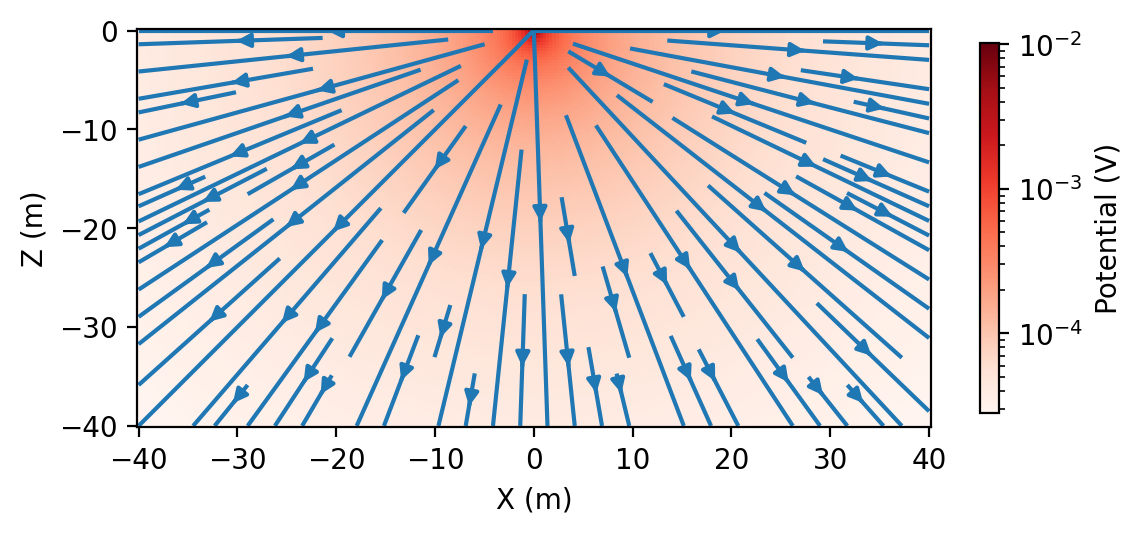

In [169]:
fig2()

## The experiment:
1) Inject and retrieve current at a source and sink (usually on a surface):

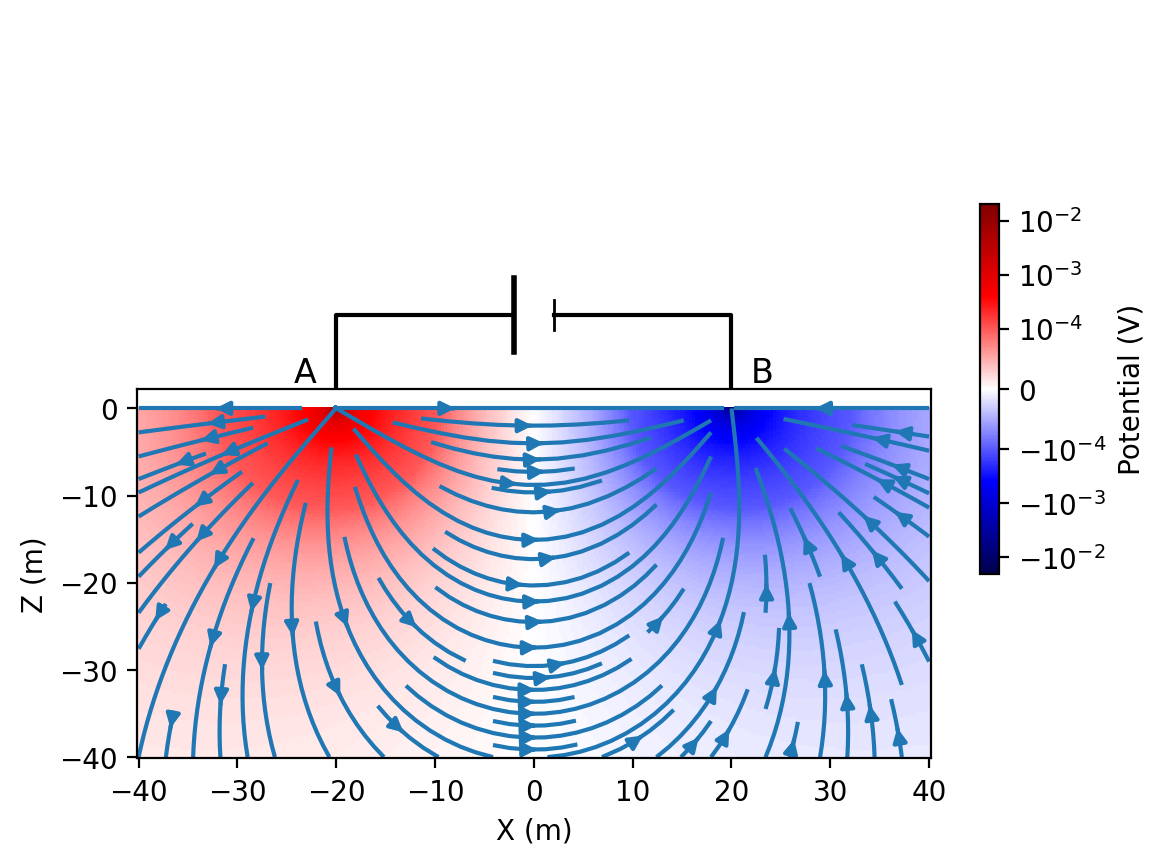

In [188]:
fig1(draw_source=True)

### Potential due to a source and sink:
* Add individual's together!

$$\phi_e = \frac{I}{2 \pi \sigma}\frac{1}{|\vec{r}_A - \vec{r}|} - \frac{I}{2 \pi \sigma}\frac{1}{|\vec{r}_B - \vec{r}|}$$
$$ = \frac{I}{2 \pi \sigma}\left(\frac{1}{|\vec{r}_A - \vec{r}|} - \frac{1}{|\vec{r}_B - \vec{r}|}\right)$$

2) Measure Voltage difference between two points (usually on the surface)

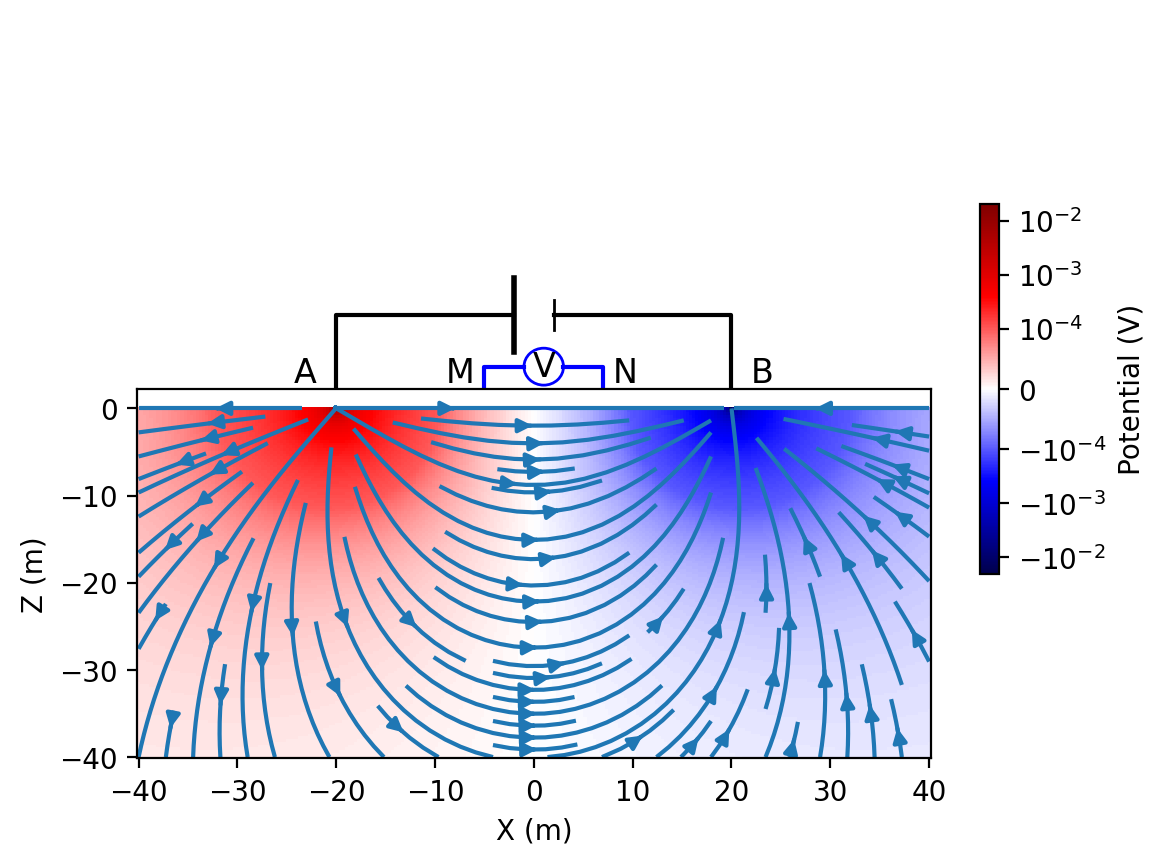

In [191]:
fig1(draw_potential=True)

### The Equation:
$$\Delta \phi = \phi(\vec{r}_M) - \phi(\vec{r}_N)$$
$$ = \frac{I}{2 \pi \sigma}\left(\frac{1}{|\vec{r}_A - \vec{r}_M|} - \frac{1}{|\vec{r}_B - \vec{r}_M|}\right) - \frac{I}{2 \pi \sigma}\left(\frac{1}{|\vec{r}_A - \vec{r}_N|} - \frac{1}{|\vec{r}_B - \vec{r}_N|}\right)
$$
$$ = \frac{I}{2 \pi \sigma}\left( \frac{1}{|\vec{r}_A - \vec{r}_M|} - \frac{1}{|\vec{r}_B - \vec{r}_M|} - \frac{1}{|\vec{r}_A - \vec{r}_N|} + \frac{1}{|\vec{r}_B - \vec{r}_N|} \right)
$$

$$ = \frac{I}{2 \pi \sigma}\left(\frac{1}{R_{AM}} - \frac{1}{R_{BM}} - \frac{1}{R_{AN}} + \frac{1}{R_{BN}} \right)
$$


## The measurement!
We measure $\Delta \phi$ and infer $\sigma$ ( or $\rho = 1/\sigma$)

If it was a halfspace then we could directly measure conductivity with our array:

$$
\Delta \phi = \frac{I}{2 \pi \sigma}\left(\frac{1}{R_{AM}} - \frac{1}{R_{BM}} - \frac{1}{R_{AN}} + \frac{1}{R_{BN}} \right)
$$

Or a bit more succinctly as:
$$ \Delta \phi = \frac{I}{\sigma} G $$
$$\text{with } G = \frac{1}{2\pi}\left(\frac{1}{R_{AM}} - \frac{1}{R_{BM}} - \frac{1}{R_{AN}} + \frac{1}{R_{BN}} \right)$$

Solving for $\sigma$
$$\sigma = \frac{I}{\Delta \phi} G$$

### How do you measure voltage anyways??
With a voltmeter!

### Analogue voltmeters
![analogue](https://cdn11.bigcommerce.com/s-g7j5rv61k1/images/stencil/1280x1280/products/426/480/SS20408-2__84790.1575924284.jpg?c=1)

* Connect in parallel with a known high resistance resistor
* A very small current goes through this wire
* Currents create magnetic fields!
* Magnetic field pushes on the dial!

### Digital Voltmeters
* Work using Analogue to Digital converters
* Compares voltage to many reference voltages.

![ADC](https://www.electronics-tutorials.ws/wp-content/uploads/2020/09/comb75.gif)

# Geophysical Equipment
## All-in-one
### ABEM Terrameter
![abem](https://www.mining-technology.com/wp-content/uploads/sites/19/2016/11/Resistivity_IP_ABEM_Terrameter_LS_2.jpg)

### Supersting R8
![SS-R8](https://scontent-den2-1.xx.fbcdn.net/v/t39.30808-6/480688055_945947837720594_977299016849432852_n.jpg?_nc_cat=111&ccb=1-7&_nc_sid=127cfc&_nc_ohc=HRBw-B_c_BIQ7kNvwFjEb9V&_nc_oc=Adn2mH1W812a1TT9dMqLRummvh5GpwbIyhFjtKRSOle4466k0Idpsf6lL0t0b-X4K9Q&_nc_zt=23&_nc_ht=scontent-den2-1.xx&_nc_gid=flmvC_ACSEXyQyQ-LJakrg&oh=00_AfdIQGcxKWqMZWuamat9mAlhz8F3ShSPEZ6Azq_4kqS-9g&oe=68F5ECE2)

### Sting R1
![Sting R1](https://pe2bz.philpem.me.uk/Detect-Sense/Products/Resistivity/stingr1.jpg)